## 01. 讀入基本套件

機器學習其實基本上和我們一直以來說的一樣, 就是我們要學一個未知的函數

$$f(x) = y$$

如果是分類, 基本上就是有一筆資料 $x=(x_1, x_2, \ldots, x_k)$, 我們想知道這

$$f(x) = y$$,

其中的 $y$ 就是某一個類別。

這種學函數的方法, 又可以分為:

* supervised learning
* unsupervised learning 

其中的 supervised learning 就是我們有一組知道答案的訓練資料, 然後找到我們要的函數。而 unsupervised learning 就神了, 我們不知道答案, 卻要電腦自己去學!

做數據分析, 幾乎每一次都要讀入這些套件!

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Jupyter Notebook 互動
from ipywidgets import interact

# 用 Seaborn 畫圖, 並設好圖的大小
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

這裡我們動用一個叫 `seaborn` 的畫圖套件, 瞬間讓我們的圖變美!

`seaborn` 和我們其他常用套件一樣也是有個標準的縮寫, 叫 `sns`。

等等, `seaborn` 怎麼縮成 `sns` 的?

原來是因為《白宮風雲》 (The West Wing) 中有位白宮的公關室副主任、副幕僚長叫 Samuel Norman Seaborn....

對, 就是 Python 向來的耍寶風格...

## 02. 關於 overfitting

我們在數據分析, 就是收集了歷史資料, 比如說這些數據。

In [3]:
X = np.random.randn(6)
Y = np.random.randn(6)

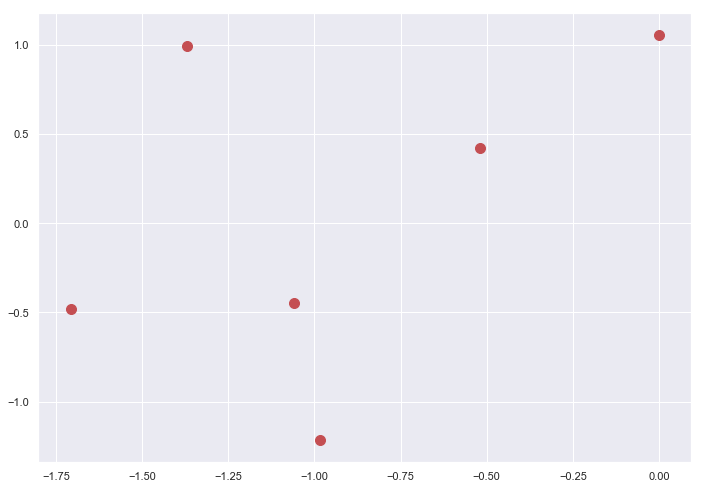

In [4]:
plt.scatter(X, Y, c='r', s=100)

我們想找一個函數, 通過越多點越好... 或是, 真的是這樣嗎?

In [5]:
X = np.random.rand(6)
Y = np.random.rand(6)

def myplot(n=1):
    plt.scatter(X, Y, c='r', s=100)
    x = np.linspace(0, 1, 1000)
    y = 0.5*np.sin(n*x) + 0.5
    plt.plot(x, y)

In [6]:
interact(myplot, n=(1., 500))

interactive(children=(FloatSlider(value=1.0, description='n', max=500.0, min=1.0), Output()), _dom_classes=('w…

<function __main__.myplot(n=1)>

學得「越像」, 不一定是越好的! 你可能覺得上面的例子太誇張了, 那我們來看看這個例子。

In [7]:
x = np.linspace(0, 1, 200)
y = -(x-1)**2+1

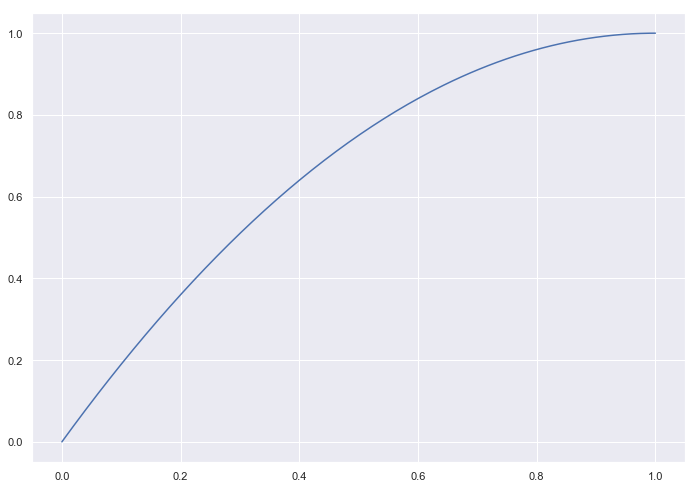

In [8]:
plt.plot(x,y)

真實世界看來比較像是這樣...

In [9]:
X = np.linspace(0, 1, 20)
Y = -(X-1)**2+1 + 0.08*np.random.randn(20)

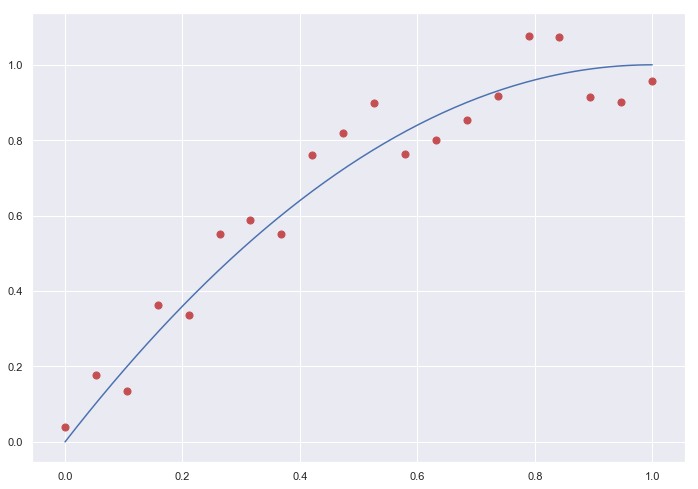

In [10]:
plt.scatter(X,Y, c='r',s=50)
plt.plot(x,y)

In [11]:
z = np.polyfit(X, Y, 19)

/Users/yenlung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


In [12]:
p = np.poly1d(z)

(0, 2)

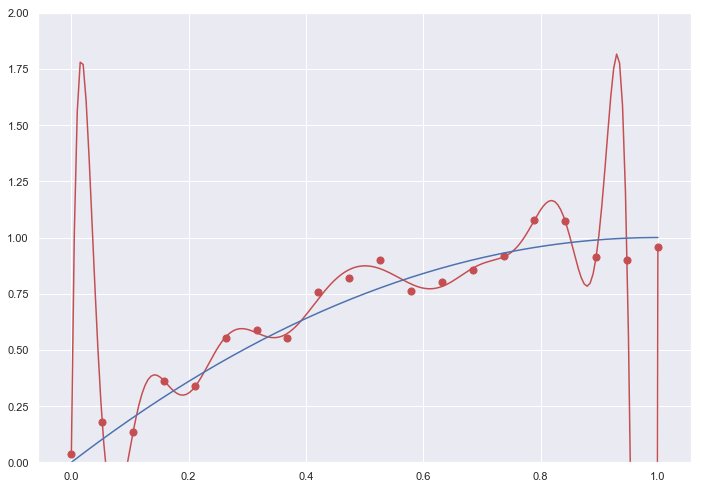

In [13]:
plt.plot(x, p(x),'r')
plt.scatter(X,Y, c='r',s=50)
plt.plot(x,y)
plt.ylim(0, 2)

這叫很低的 bias, 很高的 variance。

## 03. 迴歸法預測函數

### 03-1. 假的數據真的迴歸

#### 做一條直線

我們來一條線, 比如說

$$f(x) = 1.2x + 0.8$$

準備好個 1000 個點 (現場建議, 雖然多了一點...)

加入 noise 項, 看來更真實
大概的想法就是, 我們真實世界的問題, 化成函數, 我們假設背後有個美好的函數。但相信我們很少看到真實世界的資料那麼漂亮。在統計上, 我們就是假設

𝑓(𝑥)+𝜀(𝑥)
 
也就是都有個 noise 項。

In [14]:
x = np.linspace(0, 1, 300)

In [15]:
y = 1.2*x + 0.8 + 0.2*np.random.randn(300)

畫出圖形來。

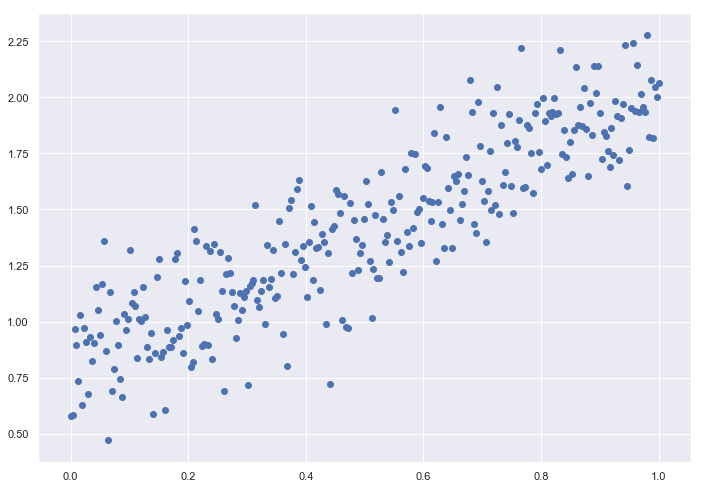

In [16]:
plt.scatter(x,y)

#### 分訓練資料、測試資料

一般我們想要看算出來的逼近函數在預測上是不是可靠, 會把一些資料留給「測試」, 就是不讓電腦在計算時「看到」這些測試資料。等函數學成了以後, 再來測試準不準確。這是我們可以用

    sklearn.model_selection
    
裡的

    train_test_split
    
來亂數選一定百分比的資料來用。

In [17]:
from sklearn.model_selection import train_test_split

把原來的 `x`, `y` 中的 80% 給 training data, 20% 給 testing data。

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2,
                                                   random_state=9487)

In [19]:
len(x_train)

240

In [20]:
len(x_test)

60

In [14]:
x_test

array([0.72972973, 0.61061061, 0.04204204, 0.26526527, 0.22122122,
       0.12712713, 0.06706707, 0.35035035, 0.00500501, 0.81881882,
       0.07207207, 0.82882883, 0.83783784, 0.12412412, 0.22422422,
       0.25625626, 0.41041041, 0.6046046 , 0.003003  , 0.16216216,
       0.56656657, 0.7957958 , 0.96396396, 0.45945946, 0.63063063,
       0.62262262, 0.75275275, 0.1991992 , 0.43743744, 0.62162162,
       0.12812813, 0.37637638, 0.63263263, 0.98998999, 0.33633634,
       0.02502503, 0.10910911, 0.77877878, 0.44544545, 0.53053053,
       0.97097097, 0.04504505, 0.66266266, 0.29329329, 0.58658659,
       1.        , 0.68968969, 0.22322322, 0.84984985, 0.36836837,
       0.81281281, 0.72272272, 0.96096096, 0.4034034 , 0.02802803,
       0.06406406, 0.3963964 , 0.15615616, 0.82282282, 0.28328328,
       0.17117117, 0.65265265, 0.42142142, 0.04004004, 0.87287287,
       0.13613614, 0.1031031 , 0.05105105, 0.37337337, 0.76676677,
       0.70770771, 0.44844845, 0.93393393, 0.24224224, 0.81381

#### 【重點】注意輸入格式

只有一個 feature 時, 我們要小心的是, 很多機器學習、深度學習的套件, 都不希望我們用

$$x = [x_1, x_2, \ldots, x_n]$$

這樣子去做, 而是希望變成

$$x = [[x_1], [x_2], \ldots, [x_n]]$$

這種形式!

In [15]:
xx = np.array([3, 9, 8, 1, 2])
yy = np.array([1, 3, 9, 2, 4])

In [16]:
xx

array([3, 9, 8, 1, 2])

In [17]:
# xx = [[3], 
#      [9], 
#      [8], 
#      [1], 
#      [2]]

In [18]:
xx.shape

(5,)

In [19]:
xx.reshape(5,1)

array([[3],
       [9],
       [8],
       [1],
       [2]])

In [20]:
xx = xx.reshape(len(xx),1)

#### 正式轉我們的訓練資料

In [21]:
x_train = x_train.reshape(len(x_train),1)

In [22]:
x_test = x_test.reshape(len(x_test), 1)

#### step 1. 開一台「線性迴歸機」

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regr = LinearRegression()

#### step 2. fit 學習、訓練

In [25]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### step 3. predict 預測

In [26]:
Ypred = regr.predict(x_test)

In [27]:
# x: x_test
# y: Ypred

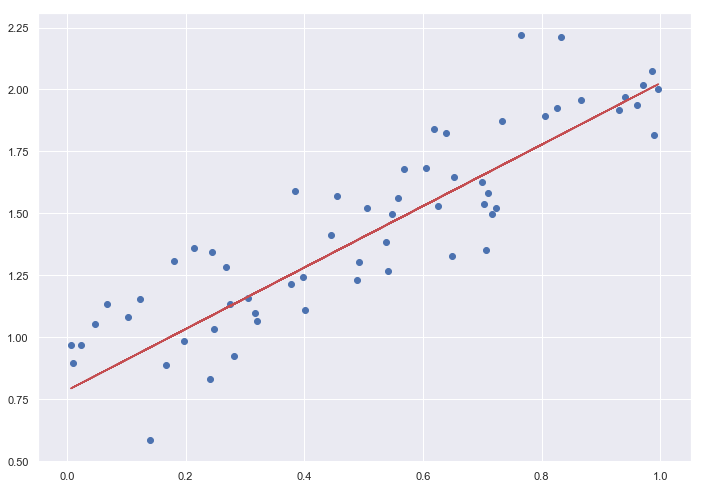

In [27]:
# x_test.ravel()

plt.plot(x_test.ravel(), Ypred, 'r')
plt.scatter(x_test.ravel(), y_test)

#### 計算分數

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
mse_t = mean_squared_error(y_train, regr.predict(x_train))
r2_t = r2_score(y_train, regr.predict(x_train))

In [30]:
print('訓練資料')
print('MSE =', mse_t)
print("R2 =", r2_t)

訓練資料
MSE = 0.035503076414434086
R2 = 0.7854944557038102


In [31]:
mse = mean_squared_error(y_test, Ypred)
r2 = r2_score(y_test, Ypred)

In [32]:
print("測試資料")
print(f"MSE = {mse:.4f}")
print(f"R2 = {r2:.4f}")


測試資料
MSE = 0.0343
R2 = 0.7639


### 03-2 房價預測

#### 讀入資料

SciKit-Learn 有許多 "Toy Datasets" 可以讓我們玩玩。

今天我們要使用的是「波士頓房價資料」。

In [33]:
from sklearn.datasets import load_boston

In [34]:
boston_dataset = load_boston()

In [35]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [36]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [38]:
boston_dataset.data[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [37]:
boston = pd.DataFrame(boston_dataset.data,
                     columns=boston_dataset.feature_names)

In [38]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
boston['MEDV'] = boston_dataset.target

In [40]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


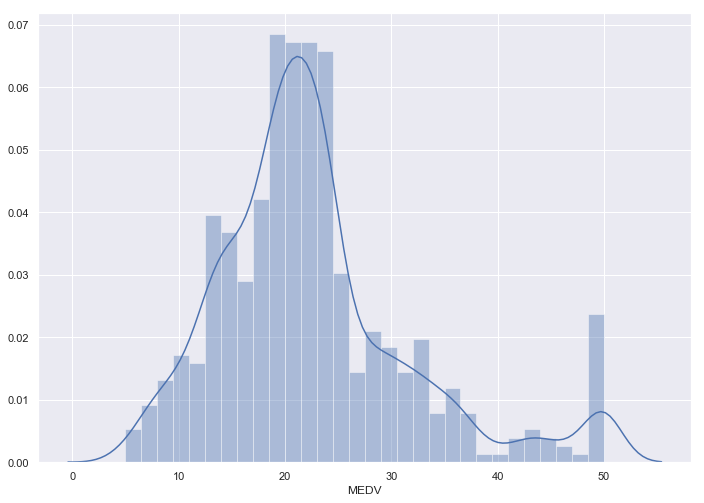

In [41]:
sns.distplot(boston.MEDV, bins=30)

In [42]:
correlation_matrix = boston.corr().round(2)

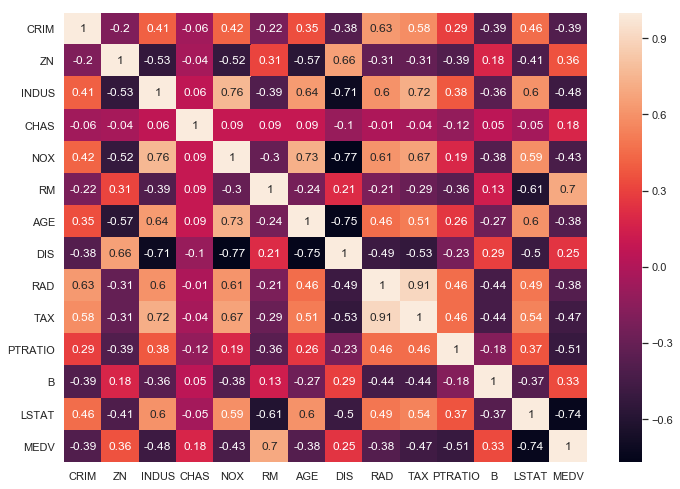

In [43]:
sns.heatmap(correlation_matrix, annot=True)

In [49]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
X = boston.loc[:,"CRIM":"LSTAT"].values
Y = boston.MEDV

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=9487)

In [46]:
regr = LinearRegression()

In [47]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
Ypred = regr.predict(x_test)

In [49]:
mse = mean_squared_error(y_test, Ypred)
r2 = r2_score(y_test, Ypred)

print("MSE =", mse)
print("R2 =", r2)

MSE = 23.62871172175499
R2 = 0.7432212177482068


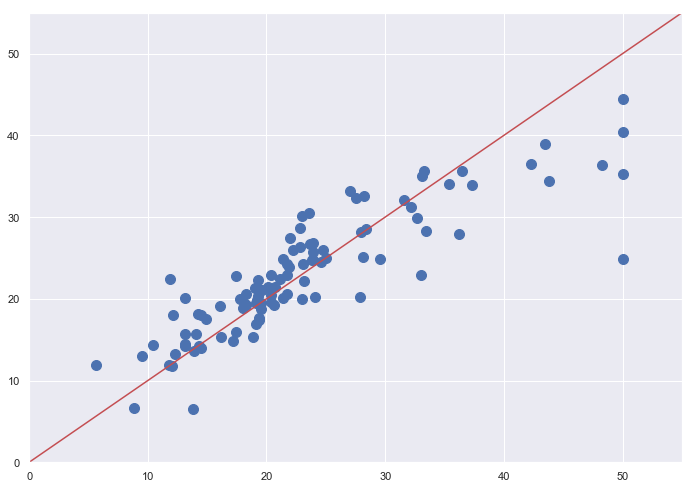

In [50]:
plt.scatter(y_test, Ypred, s=100)
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.plot([0,55],[0,55],'r')

In [58]:
X = boston[['NOX', 'AGE', 'DIS']].values

In [59]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [60]:
X = boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']].values

In [61]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=9487)

In [63]:
regr = LinearRegression()

In [64]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
Ypred = regr.predict(x_test)

In [66]:
mse = mean_squared_error(y_test, Ypred)
r2 = r2_score(y_test, Ypred)

print('MSE =', mse)
print('r2 =', r2)

MSE = 23.620687554217824
r2 = 0.743308418269041


## 04. SVM 支援向量機

### 04-1. 簡單的分類

假設我們有四個點, 有兩個類別。

In [51]:
p = np.array([[1, 2], [2, 1], [1, 1], [2, 2]])
c = np.array([1, 2, 1, 2])

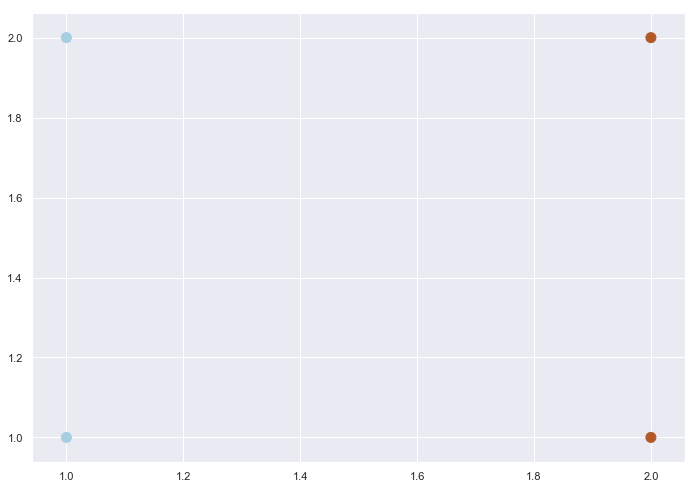

In [53]:
plt.scatter(p[:,0], p[:,1], c=c, s=100, cmap="Paired")

In [54]:
from sklearn.svm import SVC

In [57]:
clf = SVC(gamma='auto')

In [58]:
clf.fit(p, c)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
Ypred = clf.predict(p)

In [60]:
Ypred

array([1, 2, 1, 2])

In [61]:
x = y = np.arange(0.5, 2.5, 0.02)

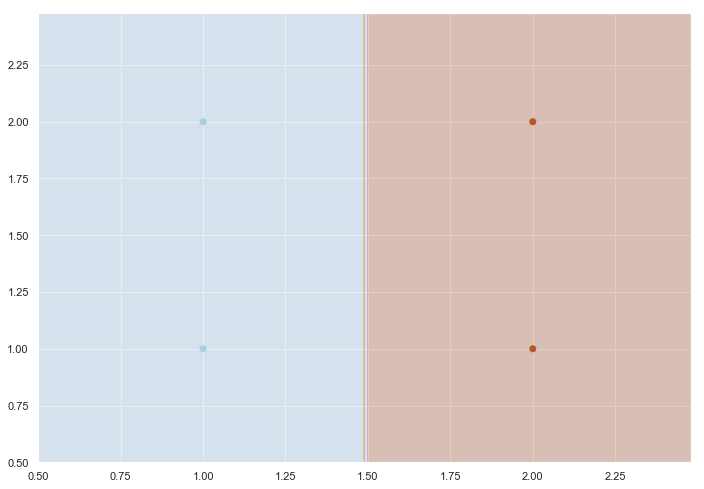

In [62]:
X, Y = np.meshgrid(x, y)
P = np.c_[X.ravel(), Y.ravel()]
z = clf.predict(P)
Z = z.reshape(X.shape)
plt.contourf(X, Y, Z, alpha=0.3, cmap='Paired')
plt.scatter(p[:,0], p[:,1], c=c, cmap='Paired')

### 04-2. 鳶尾花 Iris 數據集

In [63]:
from sklearn.datasets import load_iris

In [64]:
iris = load_iris()

In [65]:
x = iris.data
y = iris.target

In [67]:
len(x)

150

In [68]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [69]:
y[87]

1

In [70]:
X = x[:, :2]

In [71]:
Y = y

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=0)

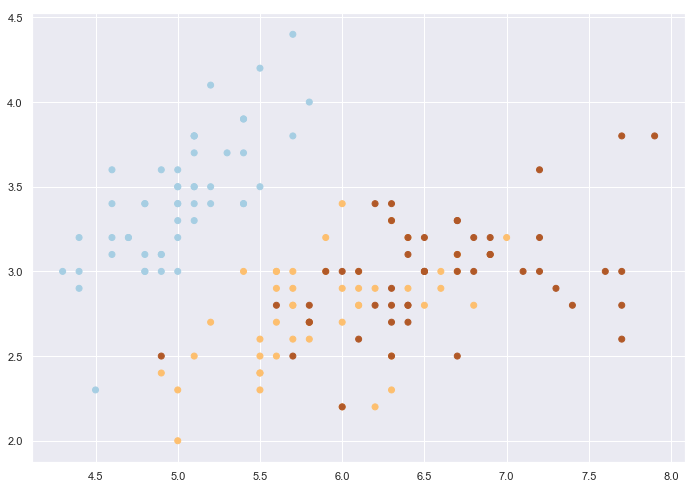

In [74]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired')

In [75]:
clf = SVC(gamma="scale")

In [76]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
Ypred = clf.predict(x_test)

In [79]:
Ypred

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [81]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [82]:
Ypred - y_test

array([-1,  0,  0,  0,  0,  0,  0,  1,  1,  0, -1,  1,  0,  1,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0])

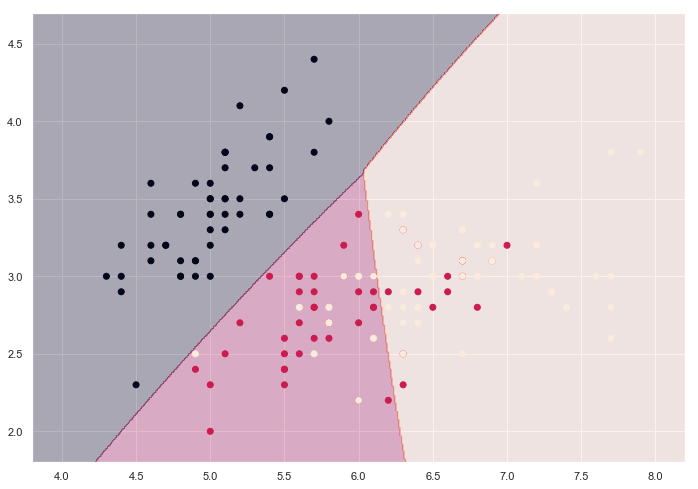

In [83]:
x0 = np.linspace(3.8, 8.2, 500)
y0 = np.linspace(1.8, 4.7, 500)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3)

plt.scatter(X[:,0], X[:,1], c=Y)

### 04-3 PCA 可以救鳶尾花嗎？

In [84]:
from sklearn.decomposition import PCA

In [85]:
pca = PCA(n_components=2)

In [86]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [87]:
X = pca.transform(x)

我們稍稍的「欣賞一下」 PCA 對我們的資料集做了什麼，來看看某朵鳶尾花的資料。

In [88]:
n = 87
x[n]

array([6.3, 2.3, 4.4, 1.3])

In [89]:
pca.transform([[6.3, 2.3, 4.4, 1.3]])

array([[ 0.81509524, -0.37203706]])

真的變成平面上一個點！來看看整個分布的狀況。

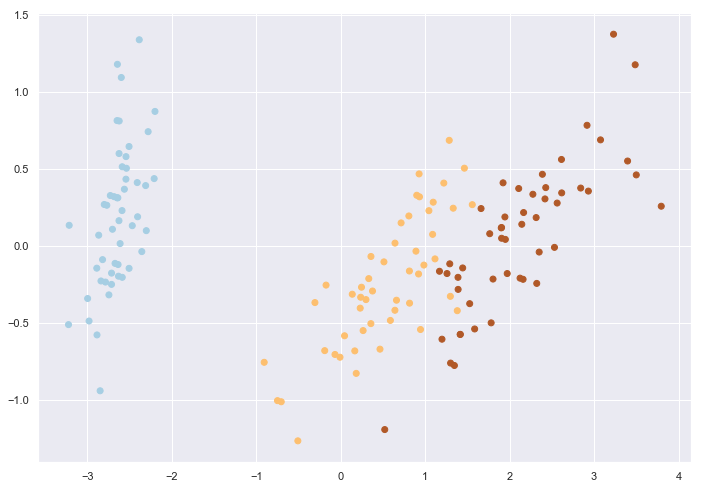

In [90]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0)

In [92]:
clf = SVC(gamma='scale')

In [93]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

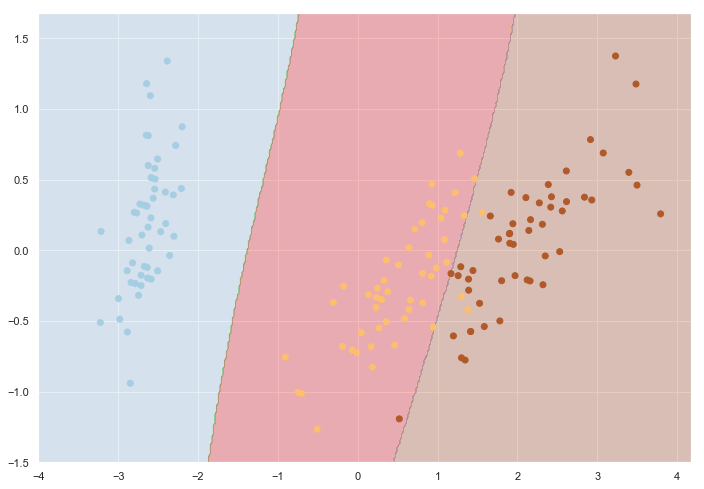

In [94]:
x0 = np.arange(-4, 4.2, 0.02)
y0 = np.arange(-1.5, 1.7, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3, cmap='Paired')
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')

## 05. K-Means 會自動分類！

我們介紹一個很好用的 unsupervised learning, 叫 K-Means。我們可以指定把我們資料分成幾類, 然後它就會快速分好!

#### 隨便生個 100 點

In [95]:
x = np.random.rand(100,2)

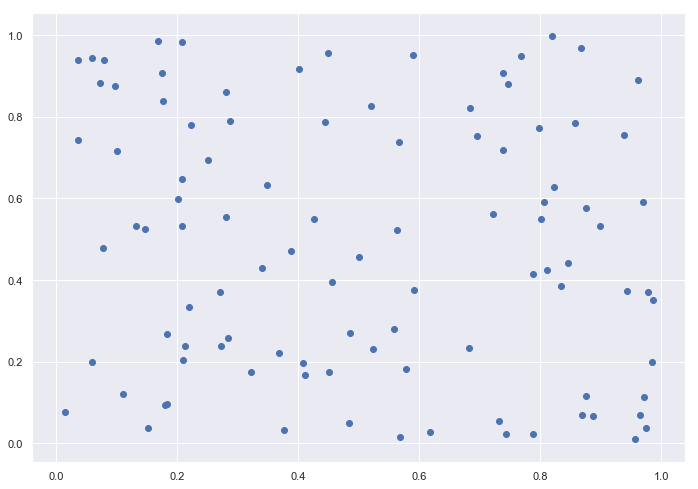

In [96]:
plt.scatter(x[:,0], x[:,1], cmap='Paired')

#### step 1. 製做一個 K-Means 分類器

和前面 SVM 很像。

In [97]:
from sklearn.cluster import KMeans

記得要告訴 K-Means 要分成幾類 (我們這裡是 3 類)。

In [98]:
clf = KMeans(n_clusters=3)

#### step 2. fit 學習、訓練

注意這時沒有「正確答案」。

In [99]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### step 3. predict

分類好的其實已經放在神秘的 `label_` 了。

In [100]:
clf.labels_

array([0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0,
       1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0,
       0, 2, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0], dtype=int32)

當然我們還是有 `predict`, 所以也可以用 `predict`算。

In [101]:
clf.predict(x)

array([0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0,
       1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0,
       0, 2, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0], dtype=int32)

答案當然都是一様的, 我們可以檢查一下!

In [107]:
np.array_equal(clf.labels_, clf.predict(x))

True

用圖來看看分得怎麼樣。

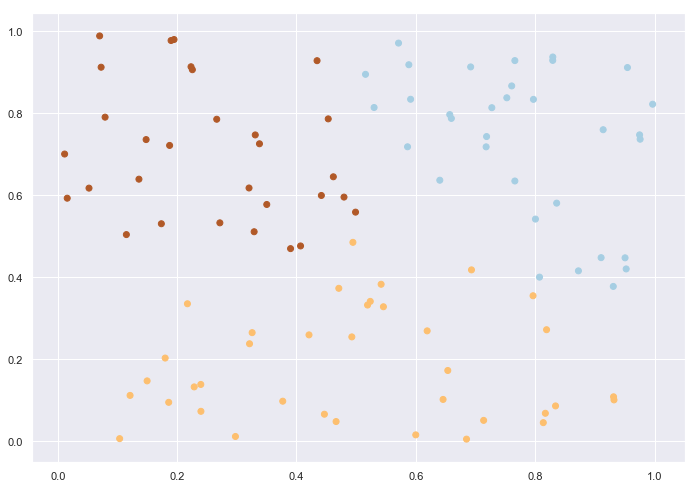

In [108]:
plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap='Paired')

來看看我們最愛的呈現方式...

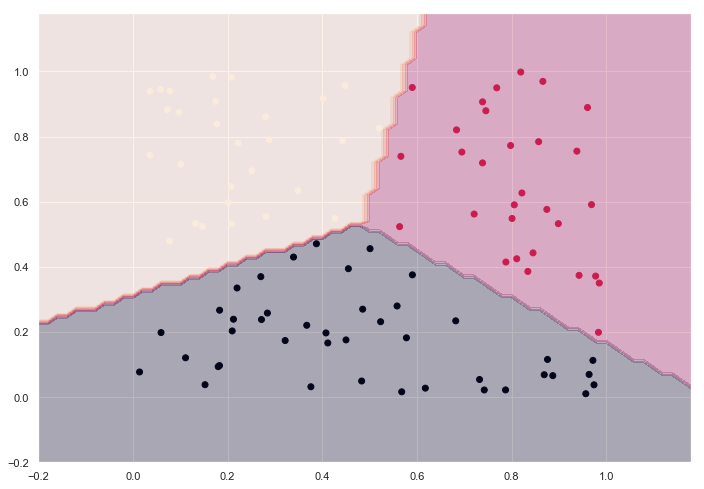

In [102]:
x0 = y0 = np.arange(-0.2, 1.2, 0.02)
xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3)
plt.scatter(x[:,0], x[:,1], c=clf.labels_)

### 06. Mean Shift 也會自動分類！

有時我們甚至不想告訴電腦, 你自動分類應該分成幾類。這時 Mean Shift 可以幫我們。

In [103]:
from sklearn.cluster import MeanShift

#### step 1. 打開 MeanShift 函數學習機

In [104]:
clf = MeanShift(bandwidth=0.2)

這裡的 `bandwidth` 是控制分類要寬鬆一點, 還是嚴一點。

#### step 2. fit 學習、訓練

In [105]:
clf.fit(x)

MeanShift(bandwidth=0.2, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

#### step 3. predict

這次我們直接畫圖!

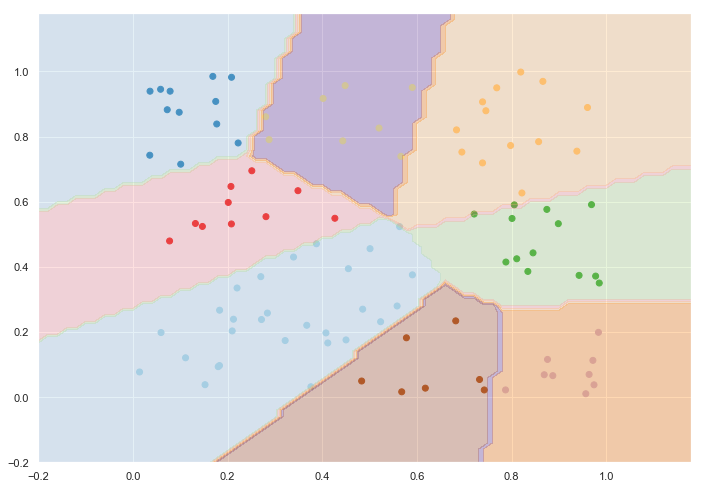

In [106]:
x0 = y0 = np.arange(-0.2, 1.2, 0.02)
xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)

plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap='Paired')
plt.contourf(xm, ym, Z, alpha=0.3, cmap="Paired")

觀察 `bandwidth` 對分類的影響。

In [107]:
def my_mean_shift(b=0.2):
    clf = MeanShift(bandwidth=b)
    clf.fit(x)

    x0 = y0 = np.arange(-0.2, 1.2, 0.02)
    xm, ym = np.meshgrid(x0, y0)

    P = np.c_[xm.ravel(), ym.ravel()]
    z = clf.predict(P)
    Z = z.reshape(xm.shape)
    
    plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap="Paired")
    plt.contourf(xm, ym, Z, alpha=0.3, cmap="Paired")

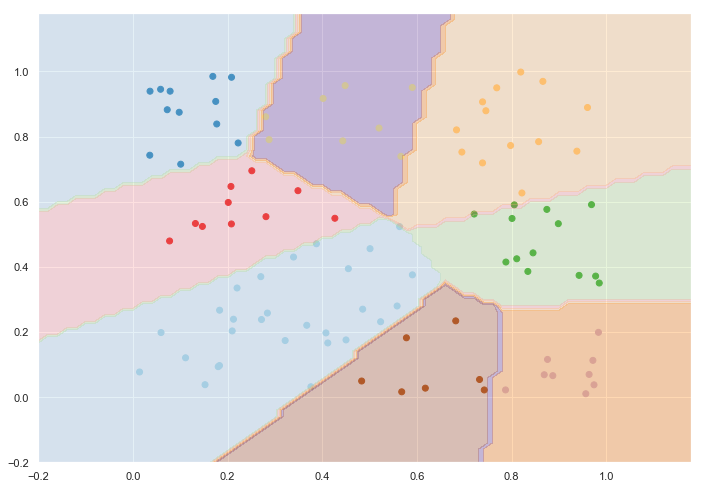

In [108]:
my_mean_shift(0.2)

In [109]:
from ipywidgets import interact

In [110]:
interact(my_mean_shift, b=(0.1, 1, 0.02))

interactive(children=(FloatSlider(value=0.2, description='b', max=1.0, min=0.1, step=0.02), Output()), _dom_cl…

<function __main__.my_mean_shift(b=0.2)>

## 07. 怎麼選最好參數、model？

### 7-1. 製造像真的一様的數據

In [111]:
from sklearn.datasets.samples_generator import make_blobs

In [112]:
x, y = make_blobs(n_samples=500, centers=3,
                 n_features=2,
                 random_state=0)

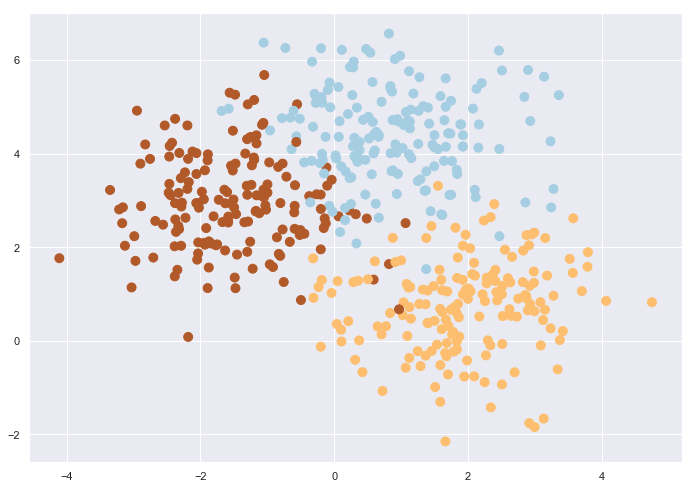

In [113]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='Paired', s=80)

### 07-2. Cross Validation

In [114]:
from sklearn.model_selection import cross_val_score

#### 試用 SVC

In [115]:
from sklearn.svm import SVC

In [116]:
clf_svc = SVC(gamma='scale')

In [117]:
scores = cross_val_score(clf_svc, x, y, cv=5)

看一下五次的成績。

In [118]:
scores

array([0.94117647, 0.95049505, 0.97979798, 0.87878788, 0.91919192])

很快的算一下平均。

In [119]:
scores.mean()

0.9338898595741927

#### 試用 Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
clf_dt = DecisionTreeClassifier()

In [122]:
scores = cross_val_score(clf_dt, x, y, cv=5)

In [123]:
scores

array([0.92156863, 0.89108911, 0.94949495, 0.90909091, 0.88888889])

In [124]:
scores.mean()

0.9120264967673238

#### 試用 Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
clf_rf = RandomForestClassifier(n_estimators=100)

In [127]:
scores = cross_val_score(clf_rf, x, y, cv=5)

In [128]:
scores

array([0.92156863, 0.92079208, 0.96969697, 0.88888889, 0.88888889])

In [129]:
scores.mean()

0.9179670908267298